# Alunos

* Arthur Severo
* Victor Le Roy

# Clustering usando K-means

In [11]:
# IMPORTS

import scipy.io as sio
import pandas as pd
import matplotlib.pyplot as plt

* **Exercicio 1:**

a. Executar o algoritmo K-means para obter 3 clusters das amostras presentes no arquivo “data2.mat”, conforme Figura 1.

![imagem1](imgs/img_clustering_1.png)

In [12]:
# Obtendo os dados
data_path = "Data"
data_file = "data2.mat"

mat = sio.loadmat(data_path + "/" + data_file)
data = pd.DataFrame(mat["X"], columns=["X1", "X2"])

In [13]:
data

,X1,X2
0,1.842080,4.607572
1,5.658583,4.799964
2,6.352579,3.290854
3,2.904017,4.612204
4,3.231979,4.939894
...,...,...
295,7.302787,3.380160
296,6.991984,2.987067
297,4.825534,2.779617
298,6.117681,2.854757


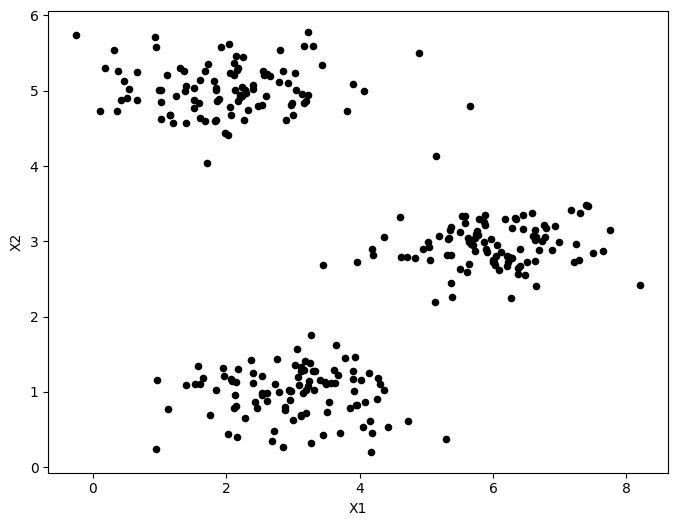

In [14]:
# Plotando os dados
plt.figure(figsize=(8, 6))
plt.scatter(data["X1"], data["X2"], color="black", s=20)
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

In [15]:
def K_Means(data, num_clusters, max_iters):
    centroids = data.sample(num_clusters).reset_index(drop=True)
    for i in range(max_iters):
        # Calculando as distâncias
        distances = pd.DataFrame()
        for j in range(num_clusters):
            distances[j] = ((data - centroids.loc[j])**2).sum(axis=1)
        # Atribuindo os clusters
        data["Cluster"] = distances.idxmin(axis=1)
        # Atualizando os centroides
        centroids = data.groupby("Cluster").mean().reset_index(drop=True)
    return data, centroids

In [16]:
def plot_k_means(data, centroids):
    plt.figure(figsize=(8, 6))
    plt.scatter(data["X1"], data["X2"], c=data["Cluster"], cmap="viridis", s=20)
    plt.scatter(centroids["X1"], centroids["X2"], color="red", s=100)
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.show()

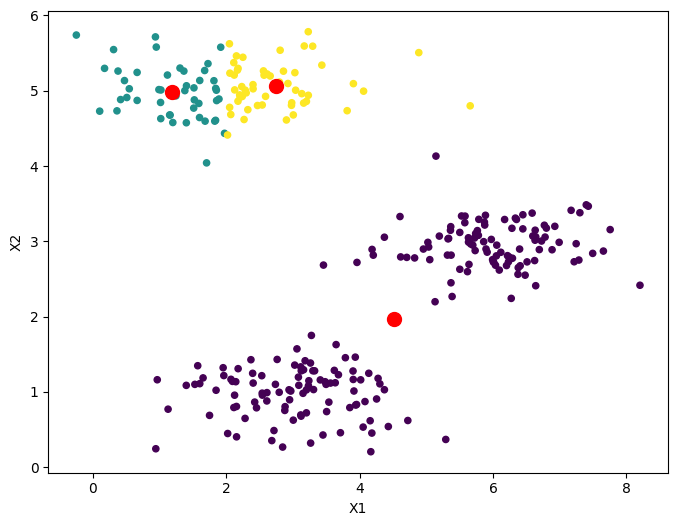

In [17]:
data, centroids = K_Means(data, 3, 10)
plot_k_means(data, centroids)